In [212]:
import jieba
import jieba.posseg as pseg
import pandas as pd
import stylecloud
from IPython.display import Image 

In [218]:
df = pd.read_excel('情感分值.xlsx')
df['评论内容'] = df['评论内容'].astype(str)
df['评论内容'].dropna(how='any', inplace=True)
df['评论内容']

0              赶紧买 太棒了 哈
1                  又要吃土了
2                    好真实
3               钱已备好，发货吧
4              听你的，行动起来吧
              ...       
5026             真的很不错哦。
5027      这个身体乳必须买，童年的味道
5028    真的很不错呀！真的太想用起来呀！
5029               非常的不错
5030             真的挺好用的啊
Name: 评论内容, Length: 5031, dtype: object

In [245]:
# 定义分词函数
def get_cut_words(content_series):
    # 读入停用词表
    stop_words = []

    with open("stopwords_cn.txt", 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())
    n_list = []
    f_pos_list = []
    for c in content_series:
        c = str(c)
        c = c.strip("\n")

        seg_list = jieba.cut("{}".format(c))
        word_list = "/".join(seg_list)
        words = pseg.cut("{}".format(c))
#         words_list = []
#         flag_list = []
        for word, flag in words:
            if word not in stop_words and len(word) >=2:
                #汉语词性统计
                if 'a' in flag or 'A' in flag:
                    n_list.append(word)
    return n_list
    
#     list_word = []
#     # 分词
#     word_num = jieba.lcut(content_series.str.cat(sep='。'), cut_all=False)

#     # 条件筛选
#     word_num_selected = [i for i in word_num if i not in stop_words and len(i) >= 2]
#     return word_num_selected



#定义机械压缩函数
def yasuo(st):
    for i in range(1,int(len(st)/2)+1):
        for j in range(len(st)):
            if st[j:j+i] == st[j+i:j+2*i]:
                k = j + i
                while st[k:k+i] == st[k+i:k+2*i] and k<len(st):   
                    k = k + i
                st = st[:j] + st[k:]    
    return st

def is_all_chinese(strs):
    for _char in strs:
        if not '\u4e00' <= _char <= '\u9fa5':
            return False
    return True


In [220]:
df['评论内容'] = df['评论内容'].apply(yasuo)
df['评论内容'].dropna(how='any', inplace=True)
df['评论内容']

0              赶紧买 太棒了 哈
1                  又要吃土了
2                    好真实
3               钱已备好，发货吧
4              听你的，行动起来吧
              ...       
5026             真的很不错哦。
5027      这个身体乳必须买，童年的味道
5028    真的很不错呀！真的太想用起来呀！
5029               非常的不错
5030             真的挺好用的啊
Name: 评论内容, Length: 5031, dtype: object

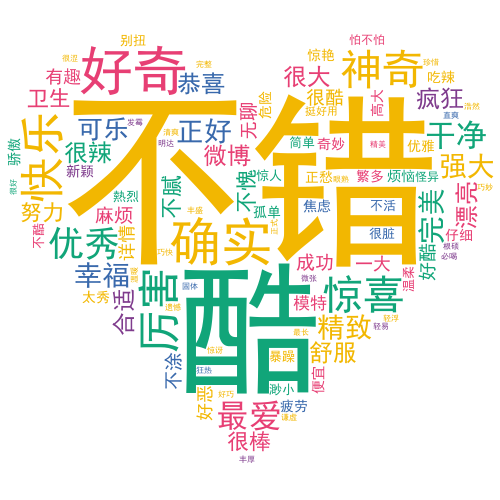

In [248]:
# 绘制词云图
text1 = get_cut_words(content_series=df['评论内容'])
for i in range(52):
    text1.append('酷')
stylecloud.gen_stylecloud(text=','.join(text1), max_words=100,
                          collocations=False,
                          font_path='simhei.ttf',
                          icon_name='fas fa-heart',
                          size=500,
                          #palette='matplotlib.Inferno_9',
                          output_name='热词-云图.png')
Image(filename='热词-云图.png')

In [235]:
text1 = get_cut_words(content_series=df['评论内容'])

ditc = {}
list_word = []
list_count = []
for t in text1:
    ditc[t] = ditc.get(t, 0) + 1
ls = list(ditc.items())
ls.sort(key=lambda x: x[1], reverse=True)
ls
# for i in range(len(ls)):
#     word, count = ls[i]
#     if is_all_chinese(word) == True:
#         list_word.append(word)
#         list_count.append(count)


# df1 = pd.DataFrame()
# df1['word'] = list_word
# df1['count'] = list_count
# df1.to_csv('高频词.csv',encoding='gbk')

[('酷', 52)]

In [53]:
import paddlehub as hub
#这里使用了百度开源的成熟NLP模型来预测情感倾向
senta = hub.Module(name="senta_bilstm")
texts = df['评论内容'].tolist()
input_data = {'text':texts}
res = senta.sentiment_classify(data=input_data)
df['情感分值'] = [x['positive_probs'] for x in res]
df.head()

[2022-01-17 16:12:53,679] [    INFO] - Installing senta_bilstm module
[2022-01-17 16:12:53,965] [    INFO] - Module senta_bilstm already installed in C:\Users\96075\.paddlehub\modules\senta_bilstm
[2022-01-17 16:12:57,486] [    INFO] - Installing lac module
[2022-01-17 16:12:57,492] [    INFO] - Module lac already installed in C:\Users\96075\.paddlehub\modules\lac


,页面网址,正文,转发,评论,点赞,发布人,发布时间,当前时间,用户名称,评论时间,评论内容,情感分值
0,https://weibo.com/2394069222/Ht7AZ0IxK?type=co...,没有火锅的人生是没有灵魂的 巧了，牙膏界和火锅界的两大巨头，冷酸灵 X 小龙坎顺应国潮，带...,1256,684,619,我朋友是个奇葩,2019-5-7 20:15,2022-01-11,暖冬溶夏,2019-5-7 20:26,赶紧买 太棒了 哈,0.9637
1,https://weibo.com/2394069222/Ht7AZ0IxK?type=co...,没有火锅的人生是没有灵魂的 巧了，牙膏界和火锅界的两大巨头，冷酸灵 X 小龙坎顺应国潮，带...,1256,684,619,我朋友是个奇葩,2019-5-7 20:15,2022-01-11,小邢不怼人,2019-5-7 20:47,又要吃土了,0.2143
2,https://weibo.com/2394069222/Ht7AZ0IxK?type=co...,没有火锅的人生是没有灵魂的 巧了，牙膏界和火锅界的两大巨头，冷酸灵 X 小龙坎顺应国潮，带...,1256,684,619,我朋友是个奇葩,2019-5-7 20:15,2022-01-11,天地正气道法无常,2019-5-7 20:46,好真实,0.9523
3,https://weibo.com/2394069222/Ht7AZ0IxK?type=co...,没有火锅的人生是没有灵魂的 巧了，牙膏界和火锅界的两大巨头，冷酸灵 X 小龙坎顺应国潮，带...,1256,684,619,我朋友是个奇葩,2019-5-7 20:15,2022-01-11,快乐的一知小青蛙,2019-5-7 20:39,钱已备好，发货吧,0.2214
4,https://weibo.com/2394069222/Ht7AZ0IxK?type=co...,没有火锅的人生是没有灵魂的 巧了，牙膏界和火锅界的两大巨头，冷酸灵 X 小龙坎顺应国潮，带...,1256,684,619,我朋友是个奇葩,2019-5-7 20:15,2022-01-11,臧萘,2019-5-7 20:35,听你的，行动起来吧,0.7911


In [54]:
df.to_excel("情感分值.xlsx",index=False)

In [55]:
df1 = pd.read_excel("情感分值.xlsx")

In [222]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [224]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(20,9),dpi = 300)
plt.hist(df['情感分值'], bins = np.arange(0, 1, 0.01), facecolor = '#212F3D')
plt.xlabel('情感数值')
plt.ylabel('数量')
plt.title('情感分析')
plt.savefig('Analysis of Sentiments.jpg')
plt.show()

D:\rgzn\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


In [225]:
df2 = df
positive1 = df2[df2['情感分值']> 0.9]
positive2 = df2[(df2['情感分值']> 0.8) & (df2['情感分值'] <= 0.9)]
positive3 = df2[(df2['情感分值']> 0.6) & (df2['情感分值'] <= 0.8)]

neutral = df2[(df2['情感分值']> 0.5) & (df2['情感分值'] <= 0.6)]

passive1 = df2[df2['情感分值'] < 0.1]
passive2 = df2[(df2['情感分值']> 0.3) & (df2['情感分值'] <= 0.5)]
passive3 = df2[(df2['情感分值']> 0.1) & (df2['情感分值'] <= 0.3)]

sum_positive = len(positive1) + len(positive2) +len(positive3)
sum_passive = len(passive1) + len(passive2) + len(passive3)

print(len(positive1),len(positive2),len(positive3))
print(len(neutral))
print(len(passive1),len(passive2),len(passive3))
print(sum_positive)
print(sum_passive)

1150 736 949
382
537 604 672
2835
1813


In [230]:
# 对原文本分词
def cut_words():
    # 获取当前文件路径
    df = pd.read_excel('情感分值.xlsx').loc[:,['评论内容']]
    text1 = df.astype('str').values
    content = ''
    for t in text1:
        text = jieba.cut(t[0], cut_all=False)
        for i in text:
            content += i
            content += " "
        content += "\n"
    return content

# 加载stopwords
def load_stopwords():
    filepath = r'stopwords_cn.txt'
    stopwords = [line.strip() for line in open(
        filepath, encoding='utf-8').readlines()]
    return stopwords

# 去除原文stopwords,并生成新的文本
def move_stopwwords(content, stopwords):
    content_after = ''
    for word in content:
        if word not in stopwords:
            # if word != '\t'and'\n':
            content_after += word

    # 写入去停止词后生成的新文本
    with open('评论信息.txt', 'w', encoding='UTF-8-SIG') as f:
        f.write(content_after)


In [231]:
content = cut_words()
stopwords = load_stopwords()
move_stopwwords(content, stopwords)

In [233]:
# coding=utf-8
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer



# 文档预料 空格连接
corpus = []

# 读取预料 一行预料为一个文档
for line in open('评论信息.txt', 'r',encoding='utf-8').readlines():
    corpus.append(line.strip())
# 将文本中的词语转换为词频矩阵 矩阵元素a[i][j] 表示j词在i类文本下的词频
vectorizer = CountVectorizer()

# 该类会统计每个词语的tf-idf权值
transformer = TfidfTransformer()

# 第一个fit_transform是计算tf-idf 第二个fit_transform是将文本转为词频矩阵
tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus))
# 获取词袋模型中的所有词语
word = vectorizer.get_feature_names()

# 将tf-idf矩阵抽取出来 元素w[i][j]表示j词在i类文本中的tf-idf权重
weight = tfidf.toarray()

# 打印特征向量文本内容
print('Features length: ' + str(len(word)))




print('Start Kmeans:')
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=2)
print(clf)
pre = clf.fit_predict(weight)
print(pre)
#
# 中心点
print(clf.cluster_centers_)
print(clf.inertia_)



from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # 输出两维
newData = pca.fit_transform(weight)  # 载入N维
print(newData)

x = [n[0] for n in newData]
y = [n[1] for n in newData]
plt.rcParams['font.sans-serif'] = ['SimHei']  # 支持中文
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,9),dpi = 300)
plt.scatter(x, y, c=pre, s=100)
# plt.legend()
plt.title("词性聚类图")
plt.savefig('词性聚类图.jpg')
plt.show()



Features length: 2583
Start Kmeans:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[0 0 0 ... 0 0 0]
[[ 2.08986416e-04  3.96101278e-04  2.08986416e-04 ...  2.08986416e-04
   2.72003262e-04  3.65320122e-04]
 [-7.31836466e-19  0.00000000e+00 -7.31836466e-19 ... -7.31836466e-19
   9.21571847e-19  8.67361738e-19]]
3746.1501106384767
[[-0.00891581 -0.00813586]
 [-0.00597039 -0.01464542]
 [-0.00605308 -0.01488858]
 ...
 [-0.00703558 -0.01339984]
 [-0.00597039 -0.01464542]
 [-0.00597039 -0.01464542]]


D:\rgzn\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
